In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_feature_selection_NEW.csv to cleaned_data_feature_selection_NEW.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data_feature_selection_NEW.csv']))

In [ ]:
df

,Unnamed: 0,REGION-CENTROID-ROW,HEDGE-MEAN,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,0,125.0,0.666667,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,1,133.0,0.500000,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,2,139.0,0.833333,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,3,137.0,1.111111,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,4,111.0,0.888889,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2305,158.0,0.833333,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834,4
2306,2306,162.0,0.333333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946,4
2307,2307,161.0,0.777778,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307,4
2308,2308,158.0,1.388889,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Prepare the data
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 1:-1]
y = df['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

Accuracy: 0.9826839826839827
Confusion Matrix:


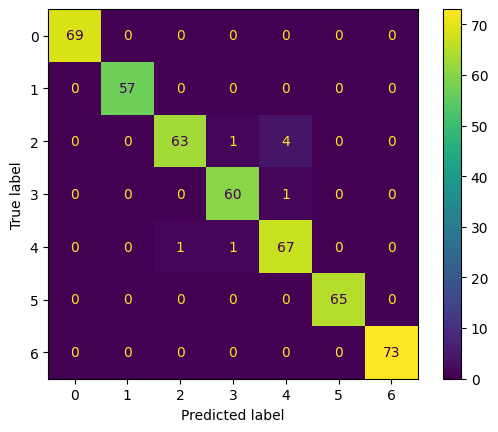

In [ ]:
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:")

confusion_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_xgb, average='macro')
print(f'Precision: {precision}')

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')
print(f'F1 Score: {f1}')

Precision: 0.9832389272913467
F1 Score: 0.982929974367442
